[Reference](https://medium.com/@kylejones_47003/boosting-stacking-and-bagging-for-ensemble-models-for-time-series-analysis-with-python-d74ab9026782)

# Bagging (Bootstrap Aggregating)

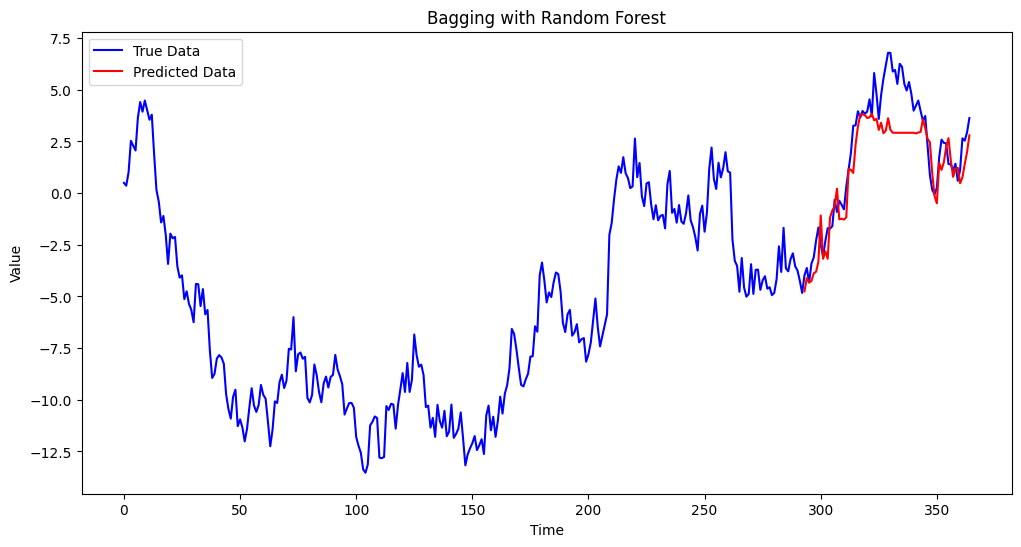

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Simulate time series data
np.random.seed(42)
data = np.cumsum(np.random.randn(365))  # Cumulative sum to mimic trend

# Create lag features
lag = 5
X = np.array([data[i:i+lag] for i in range(len(data) - lag)])
y = data[lag:]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data, label="True Data", color='blue')

# Calculate the correct index for predictions
test_data_index = range(len(data)-len(y_test), len(data))
plt.plot(test_data_index, y_pred, label="Predicted Data", color='red')

plt.title("Bagging with Random Forest")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.savefig("bagging_random_forest.png")
plt.show()


# Boosting

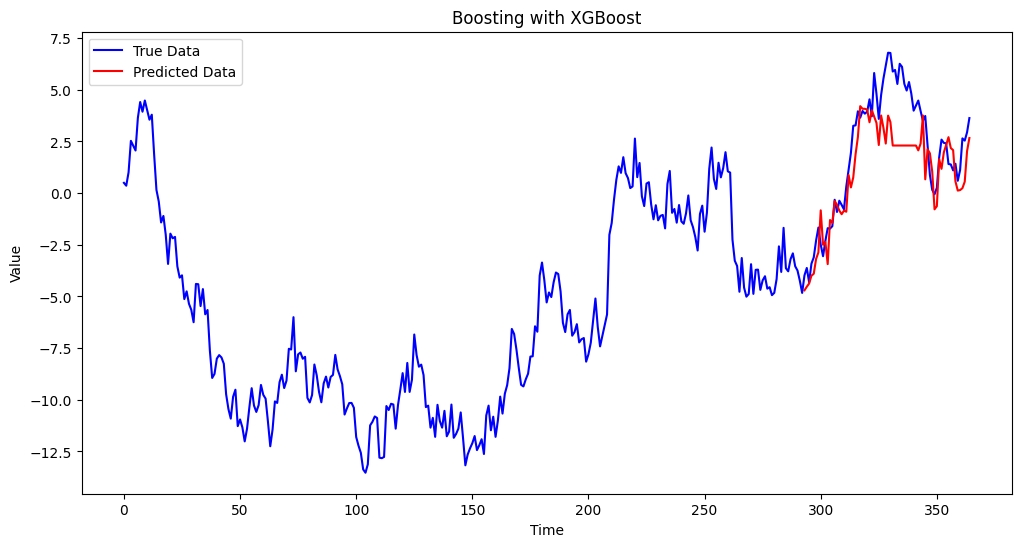

In [2]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data, label="True Data", color='blue')

# Calculate the correct index for predictions
test_data_index = range(len(data)-len(y_test), len(data))
plt.plot(test_data_index, y_pred_xgb, label="Predicted Data", color='red')

plt.title("Boosting with XGBoost")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.savefig("boosting_xgboost.png")
plt.show()

# Stacking

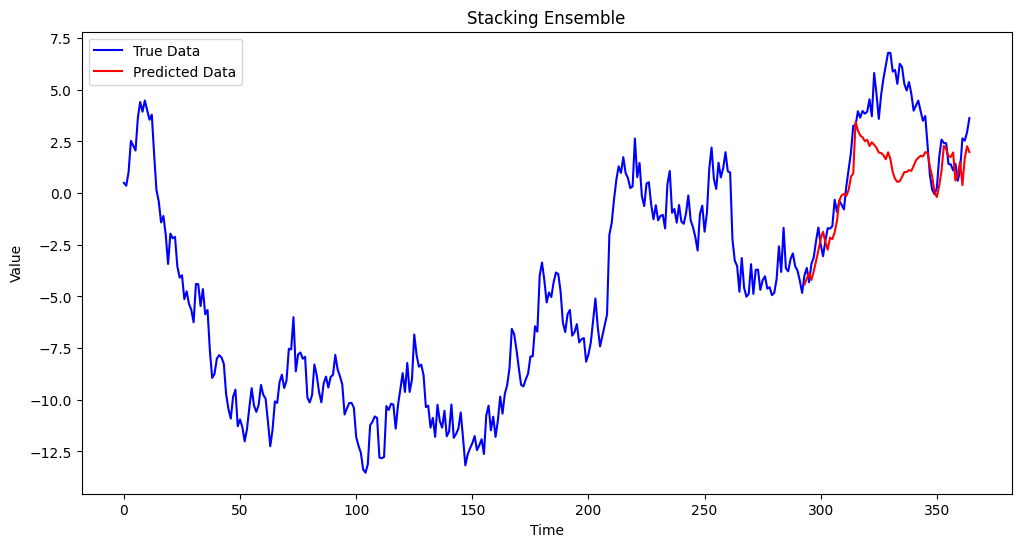

In [3]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=50, random_state=42)),
    ('svr', SVR(kernel='rbf'))
]

# Meta-model
meta_model = Ridge()

# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

# Fit the model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred_stack = stacking_model.predict(X_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data, label="True Data", color='blue')

# Calculate the correct index for predictions
test_data_index = range(len(data)-len(y_test), len(data))
plt.plot(test_data_index, y_pred_stack, label="Predicted Data", color='red')

plt.title("Stacking Ensemble")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.savefig("stacking_ensemble.png")
plt.show()